In [ ]:
Recap Airflow
=================
Create workflow (DAG) with three tasks - run in sequence 
 Task1 -> Task2 -> Task3 
  | -------|--------|

Task1 - Extract data
Task2 - Transform data
Task3 - Load data 

from airflow import DAG
from airflow.operators.python import PythonOperator
from datetime import datetime

def extract_data():
    '''Task1-Extract data'''
    reading data from API/DB/file ...

def transform_data():
    '''Task2-Transform data'''
    clean up task (or) filter 
def  load_data():
    '''Task3-Load the data'''
    Loading data into to target (data to DB/S3)

with DAG( 
      dag_id = "my_etl_tasks"
      ...
) as dag_obj

#obj = PythonOperator(task_id="userdefinedTaskID",python_callale=functionName)

t1 = PythonOperator(task_id="task1",python_callable=extract_data) 
t2 = PythonOperator(task_id="task2",python_callable=transform_data) 
t3 = PythonOperator(task_id="task3",python_callable=load_data) 

# set task dependencies
t1 >> t2 >> t3 
------------------------------------------------------------------------------
XCom - Cross-Communication
|
Key:value format of structure - stores airflow metadata database
=========

def task1(**context):
    context['K1'].xcom_push(key="my_data",value="Hello Task1")  # Push data to XCom

def task2(**context):
    value = context["K1"].xcom_pull(task_ids="TaskA",key="my_data") # Pull data from XCom
    print('recevied value:',value)

In [ ]:
Recap
========
numpy pandas matplotlib seaborn 
--------------------------------
load data from file/api/database --->batch data =>pandas 
Pyspark
  |->SQL DataFrame RDD Stream
open a dataset - small - pandas 
Vs
dataset - large data + streaming = Pyspark

RAW ->Processing -->Clean -->EDA ->Visualization ===> Machine Learning - model

ML
 |->Get the data from DE  - load
 |->split data - training/test
 |->evaluate
 |->deployment
 |->Continuous Monitoring 
 |->ModelTuning


General Programming
-----------------------
User -->input -->[m/c] -->-- output

ML programming
===============     |------|
User ----input----> | m/c  | ----->------- model (algorithm)
     ----output---> |      |
                    +------+

numpy - numerical computation
pandas - data processing
matplotlib/seaborn - data visualization
Scikit-learn - ML models
scipy 
Framework + streamlit(webUI)
Cloud 
     - aws - sagemaker
     - azure - MLStudio
     - GCP - Vertext AI
     - OCI OCI DS

DATA -> ML -> model ->....
    |
    Complex -> DeepLearning - NN - inputlayer
                                   hiddenlayer
                                   outputlayer 
                   |
                 GenAI
 data.csv
 =========
    |->cleaned data -->ML ->prediction/classification --> ...
       ............
    llm
data.csv ---embedding model--->Vector(numbers) -->[VectorDataBase]<---->[LLM]<--->[chatbot]<-->User
                                                                   .....  ===                 

End User:  Get list of sales emp's records 
AI -> ......
       .....

PersonA - 100books - info list of birds
========  --------//data - trained data
    | |<--- ......
    |
    model 

1. supervised learning
     - algorithm is trained on labeled dataset (X,Y)
     - Regression 
     - classification 
2. unsupervised learning
     - algorithm on unlabeled dataset 
     - clustering - grouping similar data points 
     - association 

3. reinforment learning 
     - agent 
        |->reward |->penalties 
           ...         ..
  2024 -> ....

In [1]:
from scipy import stats
stats.linregress

<function scipy.stats._stats_py.linregress(x, y=None, alternative='two-sided')>

In [2]:
x = [5,7,8,9,10,13,15]
y = [60,86,98,110,120,134,256]
len(x),len(y)

(7, 7)

In [3]:
stats.linregress(x,y)

LinregressResult(slope=np.float64(16.569721115537845), intercept=np.float64(-35.16733067729079), rvalue=np.float64(0.906708879975992), pvalue=np.float64(0.00485285212929791), stderr=np.float64(3.4468681876697578), intercept_stderr=np.float64(34.78727582682263))

In [4]:
slope,inter,r,p,std_err = stats.linregress(x,y)

In [5]:
import matplotlib.pyplot as plt

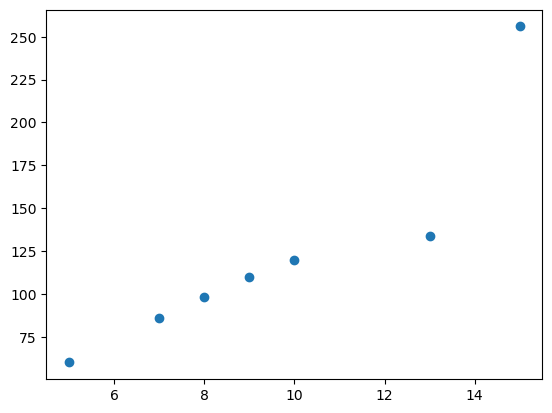

In [6]:
plt.scatter(x,y)

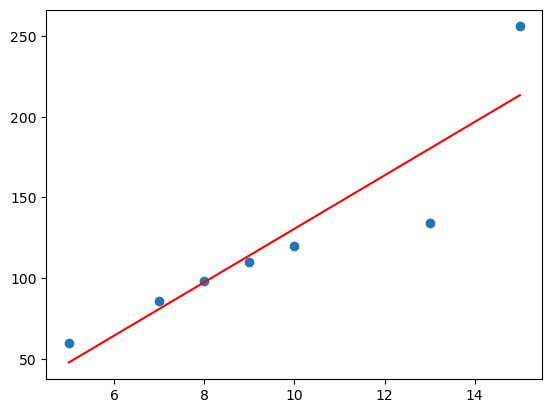

In [8]:
#y = mX+c
def fx(a):
    return slope*a+inter # y=mx+c

result = list(map(fx,x))
plt.scatter(x,y)
plt.plot(x,result,'r')

In [10]:
print(fx(20))

296.2270916334661


In [11]:
print(fx(11))

147.0996015936255


In [15]:
import numpy as np
import pandas as pd

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# loaded dataset 
data = {'pvalue':[1000,1500,2000,2500,3000],
        'pcost':[150000,200000,25000,300000,350000]}

df = pd.DataFrame(data)

# define feature input(X) and target(Y) 
X = df[['pvalue']]
Y = df['pcost']

# Create a model 
model = LinearRegression()

# Train the model 
model.fit(X,Y)

# predict result - test _ input
y_pred = model.predict(X)

# visualization

# model evaluation 
r2=r2_score(Y,y_pred)
print(f'R2 Score:{r2}')
#R-squared  -->closed 1 - OK 0.7 0.8 0.9 //ok
#MSE -->close 0 ->OK

R2 Score:0.38167938931297696


In [ ]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

In [ ]:
Random Forest
--Collection - ensemble - based on avg/vote - predictions

Student ==>Higher studies 
       -- which dept to select for higher studies ?

Student -->friend1 ==> Physics       ---------
Student -->teacher ==> Mathematics            |  --> [ Physics ]
Student -->Uncle ===> Physics    -------------
Student -->friend2 --> Civil
...


In [19]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
#help(RandomForestClassifier)


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [28]:
# loaded dataset 
data = load_iris()
X = data.data
Y = data.target


# Splitdata
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=42)

# Create a model
model = RandomForestClassifier(n_estimators=100,random_state=42)

# Train
model.fit(X_train,Y_train)

# predict
y_pred = model.predict(X_test)


In [29]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1])

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9833333333333333

In [ ]:
##################

In [34]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data,columns=data.feature_names)
Y = pd.Series(data.target)

# split dataset - 70% training 30% testing 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

# create Random Forest Classifier 
model = RandomForestClassifier(n_estimators=100,random_state=42)

# Train the model
model.fit(X_train,Y_train)

# Predict on the data
Y_pred = model.predict(X_test)

# Evaluate Performance

print("Accouracy:",accuracy_score(Y_test,Y_pred))



Accouracy: 0.9707602339181286


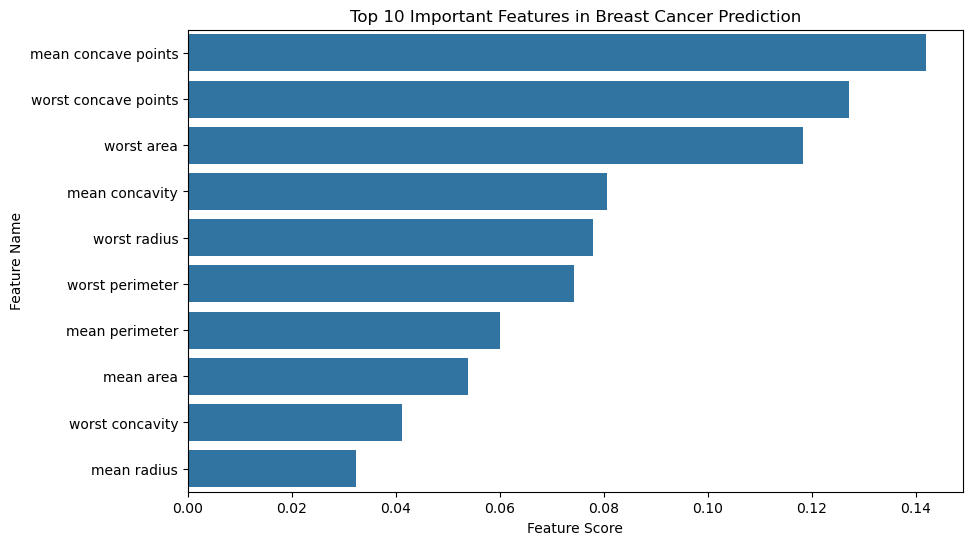

In [41]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
feature_importance = pd.Series(model.feature_importances_,index=X.columns)
important_features = feature_importance.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=important_features,y=important_features.index)
plt.title('Top 10 Important Features in Breast Cancer Prediction')
plt.xlabel('Feature Score')
plt.ylabel('Feature Name')
plt.show()

C:\Users\karth\AppData\Local\Temp\ipykernel_40680\2858620484.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=important_features,y=important_features.index,palette='viridis')


<Axes: xlabel='None', ylabel='None'>

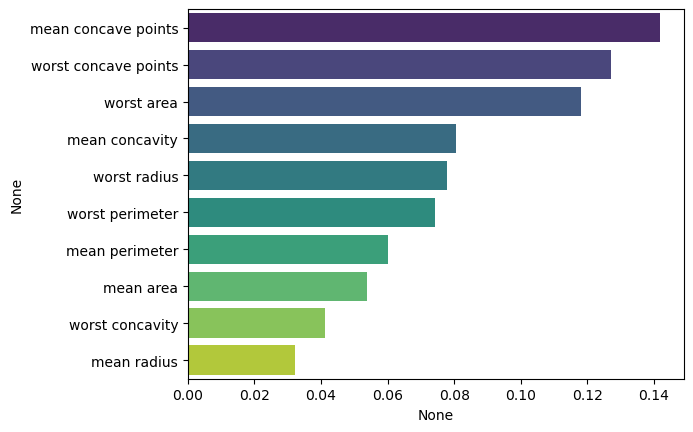

In [46]:
sns.barplot(x=important_features,y=important_features.index,palette='viridis')

In [ ]:
streamlit
===========
 |-> Open-Source app framework - webUI 
 |-> deploying data applications (DataFrame,ML model,GenAIApps)
 |-> web Apps - DS,ML applications

 |-> python code - simple function call based - there is NO html,css,javascript
 |-> streamlit function - UI widgets - like sliders,button,checkbox,text inputs etc.,
 |-> live update 
 |-> easy deployment 

 |-> pip install streamlit

     import streamlit as st

    st.title()
    st.write()
    ...
    --------------------------//p1.py

     python -m streamlit run p1.py



In [47]:
! streamlit run DE-Day4/p1.py

^C


In [48]:
! streamlit run DE-Day4/regression.py

^C


In [49]:
! streamlit run DE-Day4/randomForestML.py

^C


In [ ]:
Flask 
======
 |-> WebFrame work - python based webframe work

 |-> webframework - collection of tools
        |-> start and control webserver daemon/service 

 |-> pythonCode + templateCode - jinja2  + html + css + js

 |-> Decorator design 
         |
       function - meta programming - adding more features to an existing code

 def decoratorFunction(new_feature):
     def wrapper_Function(*args,**kwargs):
             new_feature()
     return wrapper_Function
==============================================//decorator code

def f1():
     ....
     ....
f1 = decoratorFunction(f1)
f1()
-----------------------------//
||||

@decoratorFunction
def f1():
    ....
    ....

@decoratorFunction
def f2():
    ....
    ....



In [50]:
def news(a1):
    def wrapper():
        a1()
    return wrapper

In [51]:
@news
def city1():
    print('This is City1 Block')

In [52]:
@news
def city2():
    print('This is City2 Block')

In [ ]:
[Home] [AboutUs] [news] [contactUs] [Blogs]  
                  |-->City1
                  |-->City2
---------------------------------------------//Running - V1.0

[Home] [AboutUs] [news] [contactUs] [Blogs]  [APIs]
                  |-->City1
                  |-->City2
                  |==>City3

In [ ]:
MVT design

import flask
          |->module

flask.Flask  -->app_obj
        |-->className - constructor argument - current module => __name__

from flask import Flask,render_template
@app_obj.route("/")
def f1():
    ''' Webcontent about / URL'''
    return '<h1>Welcome</h1>'

@app_obj.route("/aboutus")
def f2():
    return '<h1> aboutUs page</h1>'

@app_obj.route("/mypage")
def f3():
    return render_template('display.html')

if __name__ == '__main__':
    app_obj.run(debug=True,port=1234)


project/
     |->demoApp.py <== flask-Code
     |
     |->templates/
             |->login.html
             |->display.html
     |->static/
            |->..
     ..
===================================

In [53]:
import requests
requests.get('http://127.0.0.1:5000/mydata').headers

{'Server': 'Werkzeug/3.1.3 Python/3.10.0', 'Date': 'Thu, 06 Nov 2025 12:34:23 GMT', 'Content-Type': 'application/json', 'Content-Length': '89', 'Connection': 'close'}

In [54]:
requests.get('http://127.0.0.1:5000/myapi').headers

{'Server': 'Werkzeug/3.1.3 Python/3.10.0', 'Date': 'Thu, 06 Nov 2025 12:36:26 GMT', 'Content-Type': 'application/json', 'Content-Length': '89', 'Connection': 'close'}

In [55]:
requests.get('http://127.0.0.1:5000/aboutus').headers

{'Server': 'Werkzeug/3.1.3 Python/3.10.0', 'Date': 'Thu, 06 Nov 2025 12:36:39 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '22', 'Connection': 'close'}

In [56]:
requests.get('http://127.0.0.1:5000/myapi').json()

{'pid': [10, 20, 30], 'pname': ['pA', 'pB', 'pC']}

In [ ]:
<h1>ProductName:{{pname}}</h1>
                   |- jinja2 template

In [ ]:
################## end of the day4 ############################